<a href="https://colab.research.google.com/github/negar67/Python/blob/master/MultiClassClassifierEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load a dataset and train two models to perform multiclass classification.
#compare the results of the models
#Dataset is the "digits" dataset from sklearn's datasets library.
#Goal: to identify digits from 0 to 9 correctly

#importing all necessary libraries and dataset
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits #import load_digits function from the sklearn's datasets library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
#load the dataset
X, y = load_digits(return_X_y=True) #invokes load_digits with setting the return_X_y parameter to True and store the returned datasets in X, y variables

In [26]:
#performing Exploratory Data Analysis
#displaying the number of rows and features in the dataset and checking if it is a balanced dataset (having almost same number of samples in each class)
X.shape

(1797, 64)

In [29]:
#we see that there are 10 classes with ~180 samples in each one so it is a balanced dataset
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [0]:
#split the dataset into training and testing data
#test data proportion is 20%
#setting the random_state to make the results repeatable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [39]:
#create a LogisticRegression classifier and use 5-fold cross validation to train the model
#set the solver to 'lbfgs' and multiclass strategy to 'ovr' in LogisticRegression 
lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
lr_cv_scores = cross_val_score(lr_clf, X, y, cv=5)

print('Accuracy scores for the 5 folds: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(lr_cv_scores.mean()))

Accuracy scores for the 5 folds:  [0.90833333 0.87777778 0.94428969 0.9637883  0.8913649 ]
Mean cross validation score: 0.917


In [41]:
#This time create a RandomForest classifier and use 5-fold cross validation to train the model
rf_clf = RandomForestClassifier(n_estimators = 24)
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(rf_cv_scores.mean()))

Accuracy scores for the 5 folds:  [0.90833333 0.89166667 0.94986072 0.95543175 0.89972145]
Mean cross validation score: 0.921


In [44]:
#fit the classifier and then generate predictions on the test data
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        33
           3       0.97      0.93      0.95        40
           4       0.95      0.97      0.96        40
           5       0.97      0.95      0.96        37
           6       1.00      0.89      0.94        35
           7       0.97      0.97      0.97        38
           8       0.83      0.97      0.90        31
           9       0.94      0.91      0.93        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [0]:
#function to better visualize the confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

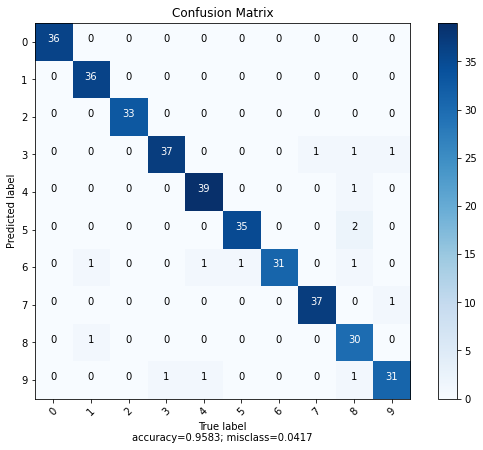

In [47]:
confusion_rf = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm=confusion_rf, target_names=[i for i in range(10)], title = 'Confusion Matrix', normalize=False)